In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plot
import pandas as pd

# Dane z sezonowością (sprzedaż kwartalna)
sales = [30, 45, 80, 100,  # Rok 1
         35, 50, 85, 105,  # Rok 2
         40, 55, 90, 110,  # Rok 3
         45, 60, 95, 115]  # Rok 4

seasonal_period = 4

In [2]:
# Model Holt-Winters addytywny
model = ExponentialSmoothing(
    sales,
    seasonal_periods=seasonal_period,
    trend='add',        # Trend addytywny
    seasonal='add',     # Sezonowość addytywna
    initialization_method='estimated'
)

# Dopasowanie modelu
fitted = model.fit()

# Wartości wygładzone
smoothed = fitted.fittedvalues

# Prognozy
forecasts = fitted.forecast(steps=4)

print("Dane oryginalne: ", sales)
print("Dane wygładzone: ", [round(x, 2) for x in smoothed])
print(f"\nPoziom końcowy: {fitted.level[-1]:.2f}")
print(f"Trend końcowy: {fitted.trend[-1]:.3f}")
print(f"Sezonowość: {[round(s, 2) for s in fitted.season]}")
print(f"\nPrognozy: {[round(x, 2) for x in forecasts]}")
print(f"\nParametry:")
print(f"  α (smoothing_level): {fitted.params['smoothing_level']:.3f}")
print(f"  β (smoothing_trend): {fitted.params['smoothing_trend']:.3f}")
print(f"  γ (smoothing_seasonal): {fitted.params['smoothing_seasonal']:.3f}")

Dane oryginalne:  [30, 45, 80, 100, 35, 50, 85, 105, 40, 55, 90, 110, 45, 60, 95, 115]
Dane wygładzone:  [np.float64(30.0), np.float64(45.0), np.float64(80.0), np.float64(100.0), np.float64(35.0), np.float64(50.0), np.float64(85.0), np.float64(105.0), np.float64(40.0), np.float64(55.0), np.float64(90.0), np.float64(110.0), np.float64(45.0), np.float64(60.0), np.float64(95.0), np.float64(115.0)]

Poziom końcowy: 81.12
Trend końcowy: 1.250
Sezonowość: [np.float64(-32.37), np.float64(-18.62), np.float64(15.13), np.float64(33.88), np.float64(-32.37), np.float64(-18.62), np.float64(15.13), np.float64(33.88), np.float64(-32.37), np.float64(-18.62), np.float64(15.13), np.float64(33.88), np.float64(-32.37), np.float64(-18.62), np.float64(15.13), np.float64(33.88)]

Prognozy: [np.float64(50.0), np.float64(65.0), np.float64(100.0), np.float64(120.0)]

Parametry:
  α (smoothing_level): 1.000
  β (smoothing_trend): 0.013
  γ (smoothing_seasonal): 0.000


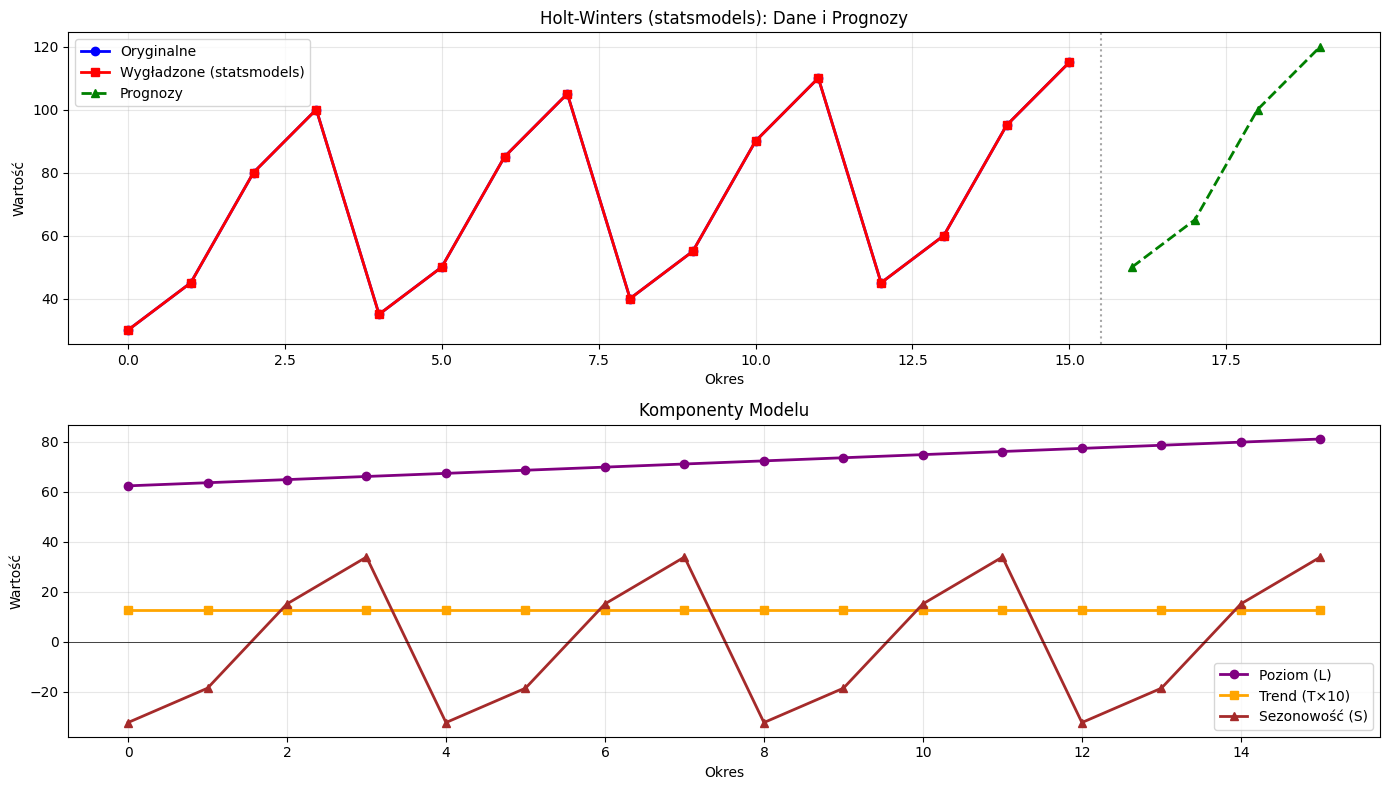

In [3]:
# Wizualizacja
figure = plot.figure(figsize=(14, 8))

# Wykres 1: Dane i prognozy
plot.subplot(2, 1, 1)
plot.plot(sales, label='Oryginalne', marker='o', color='blue', linewidth=2)
plot.plot(smoothed, label='Wygładzone (statsmodels)', marker='s', color='red', linewidth=2)
plot.plot(range(len(sales), len(sales) + len(forecasts)), forecasts, 
          label='Prognozy', marker='^', linestyle='--', color='green', linewidth=2)
plot.axvline(x=len(sales)-0.5, color='gray', linestyle=':', alpha=0.7)
plot.title("Holt-Winters (statsmodels): Dane i Prognozy")
plot.xlabel("Okres")
plot.ylabel("Wartość")
plot.legend()
plot.grid(True, alpha=0.3)

# Wykres 2: Komponenty
plot.subplot(2, 1, 2)
plot.plot(fitted.level, label='Poziom (L)', marker='o', color='purple', linewidth=2)
plot.plot([t*10 for t in fitted.trend], label='Trend (T×10)', marker='s', color='orange', linewidth=2)
seasonal_full = [fitted.season[i % seasonal_period] for i in range(len(sales))]
plot.plot(seasonal_full, label='Sezonowość (S)', marker='^', color='brown', linewidth=2)
plot.title("Komponenty Modelu")
plot.xlabel("Okres")
plot.ylabel("Wartość")
plot.legend()
plot.grid(True, alpha=0.3)
plot.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plot.tight_layout()
plot.show()

In [4]:
# Model multiplikatywny (dla porównania)
model_mul = ExponentialSmoothing(
    sales,
    seasonal_periods=seasonal_period,
    trend='add',
    seasonal='mul'      # Sezonowość multiplikatywna
)

fitted_mul = model_mul.fit()
forecasts_mul = fitted_mul.forecast(steps=4)

print("Model ADDYTYWNY:")
print(f"  Prognozy: {[round(x, 2) for x in forecasts]}")
print(f"\nModel MULTIPLIKATYWNY:")
print(f"  Prognozy: {[round(x, 2) for x in forecasts_mul]}")
print(f"\nDla tych danych oba modele dają podobne wyniki.")
print(f"Multiplikatywny lepiej sprawdza się gdy sezonowość rośnie z poziomem.")

Model ADDYTYWNY:
  Prognozy: [np.float64(50.0), np.float64(65.0), np.float64(100.0), np.float64(120.0)]

Model MULTIPLIKATYWNY:
  Prognozy: [np.float64(43.72), np.float64(60.9), np.float64(100.99), np.float64(123.73)]

Dla tych danych oba modele dają podobne wyniki.
Multiplikatywny lepiej sprawdza się gdy sezonowość rośnie z poziomem.
